### Loan Status Prediction 

### Importing the Model Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [2]:
df = pd.read_csv("C:/Users/user/Desktop/Loan_Status_Prediction_Case_Study-main/Loan_Status_Prediction_Case_Study-main/LoanData.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Understanding the dataset

In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.describe(include= object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Checking the missing values

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Checking Percentage of the missing value

In [9]:
df.isnull().sum() * 100 / df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Replacing null values with mode for object data type (i.e. Caterorical Data)

In [10]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Replacing null values with median for numberic data type

In [12]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df.shape

(614, 13)

### Checking the outliers detection and its treatments

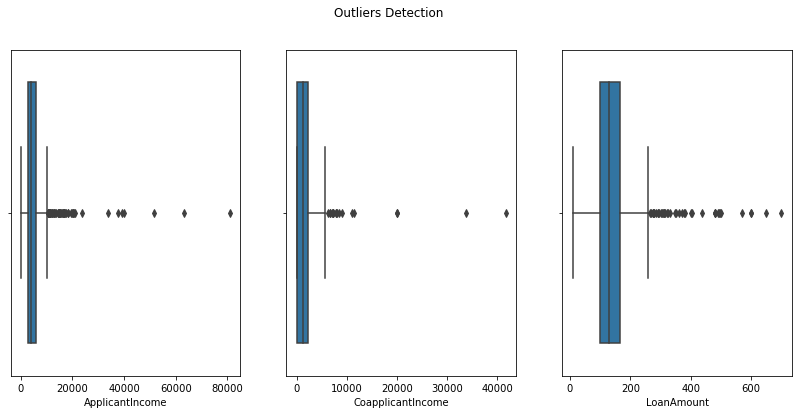

In [15]:
plt.figure(figsize = (14,6))

plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outliers Detection')
plt.show()

In [16]:
print("Before Removing the outliers", df.shape)

df = df[df['ApplicantIncome']<25000]

print("After Removing the outliers", df.shape)

Before Removing the outliers (614, 13)
After Removing the outliers (607, 13)


In [17]:
print("Before Removing the outliers", df.shape)

df = df[df['CoapplicantIncome']<12000]

print("After Removing the outliers", df.shape)

Before Removing the outliers (607, 13)
After Removing the outliers (603, 13)


In [18]:
print("Before Removing the outliers", df.shape)

df = df[df['LoanAmount']<400]

print("After Removing the outliers", df.shape)

Before Removing the outliers (603, 13)
After Removing the outliers (591, 13)


### Analysis

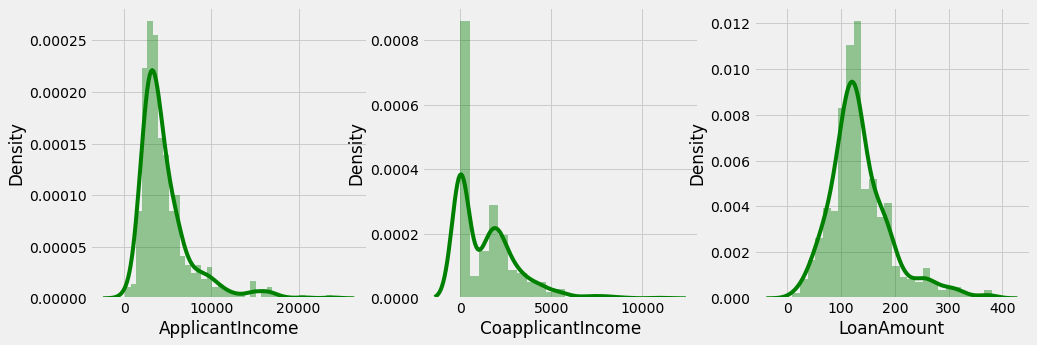

In [19]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)


plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'], color='green')

plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'], color='green')

plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'], color='green')

plt.show()

### Univariate Analysis

### Target Variable

In [20]:
df['Loan_Status'].value_counts()

Y    408
N    183
Name: Loan_Status, dtype: int64

In [21]:
df['Loan_Status'].value_counts(normalize = True)

Y    0.690355
N    0.309645
Name: Loan_Status, dtype: float64

<AxesSubplot:>

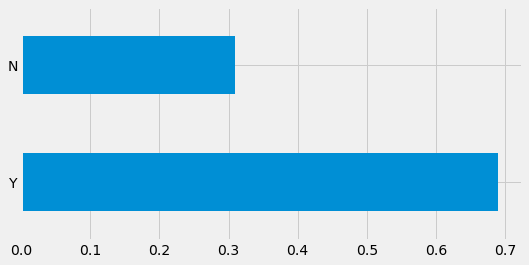

In [22]:
df['Loan_Status'].value_counts(normalize = True).plot.barh(figsize = (8,4))

### Conclusions

* 408(around 69%) people out of 591 got the approval.

### Independent Variable (Categorical)

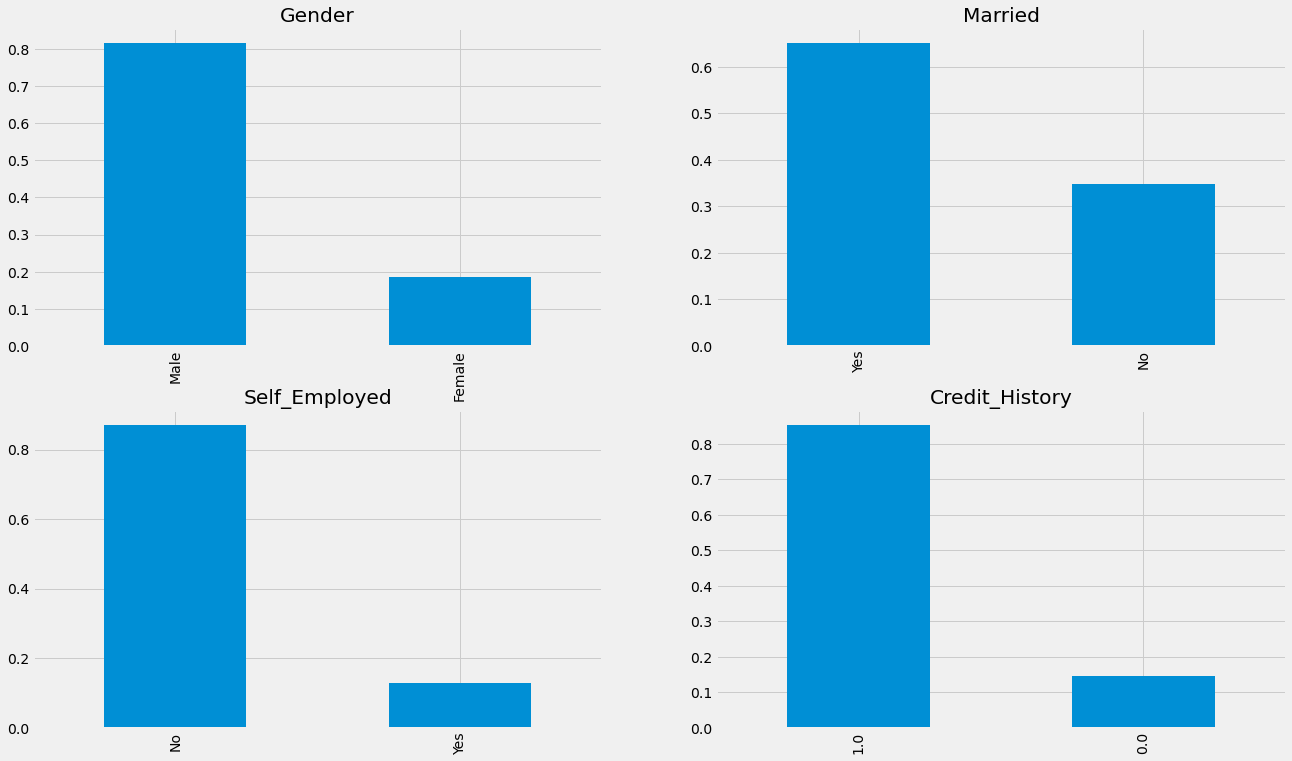

In [23]:
plt.figure(1)

plt.subplot(221) 
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,12), title= 'Gender')

plt.subplot(222) 
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

plt.subplot(223)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224) 
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

### Conclusions

* 80% of applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* About 15% of applicants in the dataset are self-employed.
* About 85% of applicants have repaid their debts.

### Independent Variable (Ordinal)

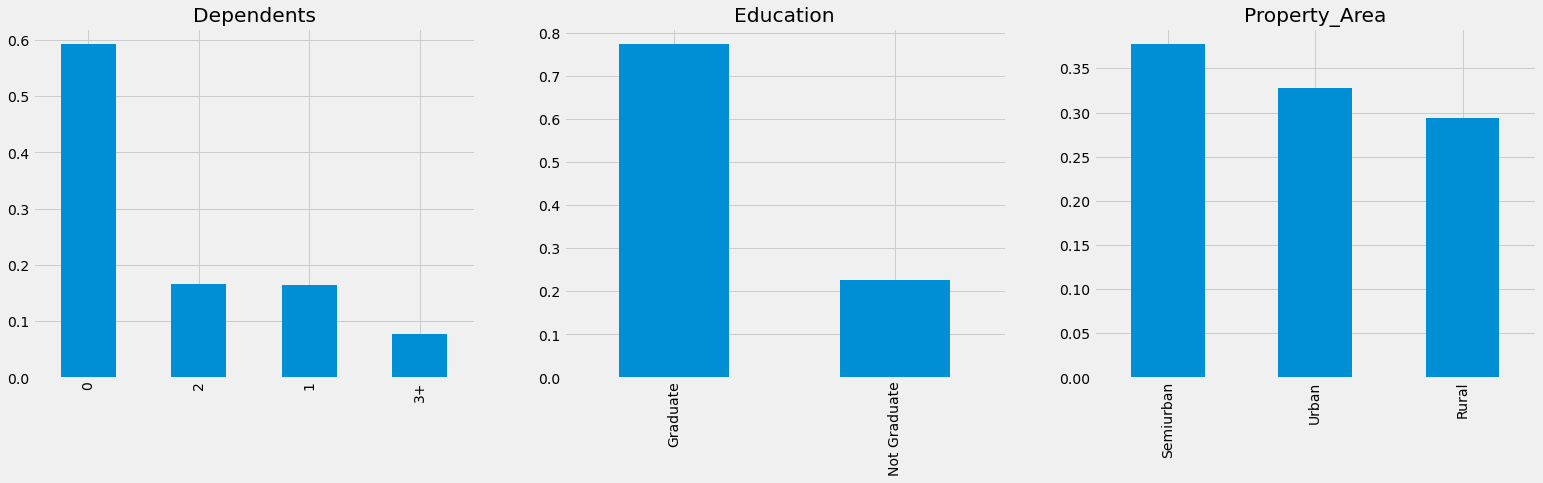

In [24]:
plt.figure(1)

plt.subplot(131)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')

plt.subplot(132)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133) 
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

### Conclusions

* Most of the applicants don’t have dependents.
* About 78% of the applicants are graduates.
* Most of the applicants are from semi-urban areas.

### Bivariate Analysis

### Analysis on Categorical with target

In [25]:
categorical_col = df.select_dtypes(include='object').columns
categorical_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
cat = categorical_col[1:-1]
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

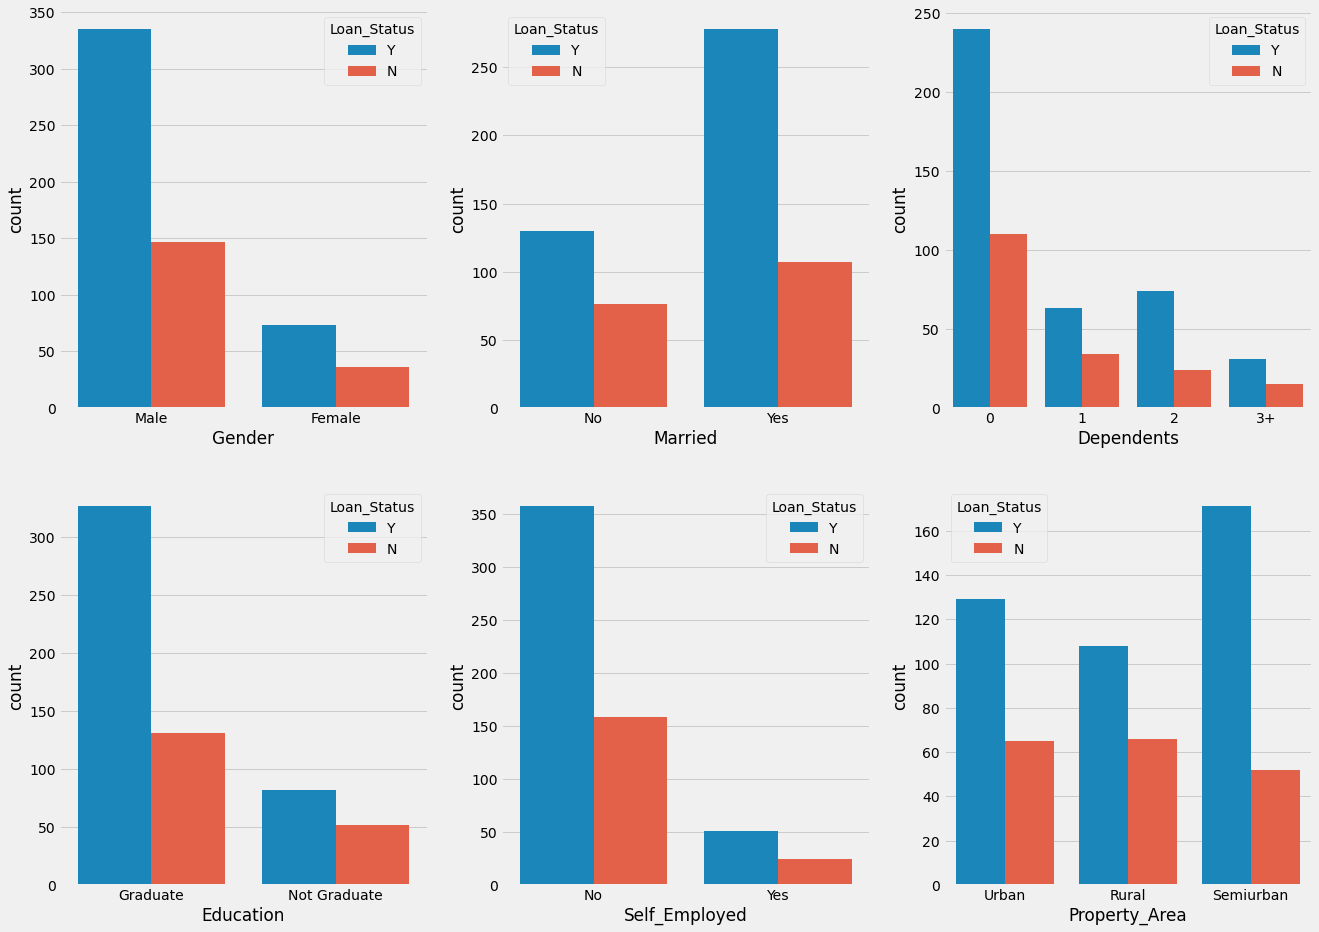

In [27]:
fig , axes = plt.subplots(figsize=(20,15),nrows=2, ncols=3)

for ax, column in zip(axes.flatten(),cat):
    sns.countplot(df[column],ax=ax, hue=df['Loan_Status'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

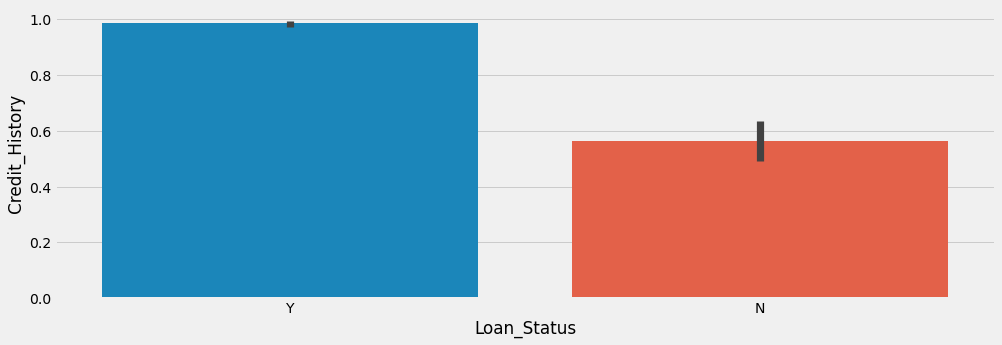

In [28]:
sns.barplot(df.Loan_Status, df.Credit_History, data = df)

### Conclusions

* The proportion of male and female applicants is more or less the same for both approved and unapproved loans.
* The proportion of married applicants is higher for the approved loans.
* The proportion of loans getting approved with 0 dependents is more as pompared to the 1 or 2 or 3+ dependents.
* The loan is getting approved much higher for graduate than Not graduate.
* The self employed is getting less loan approved as compared to non self employed.
* The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.
* The people with a credit history of 1 are more likely to get their loans approved.

### Categorical with Target

In [29]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [30]:
pd.crosstab(df['Loan_Status'],df['Gender'])

Gender,Female,Male
Loan_Status,,
N,36,147
Y,73,335


In [31]:
pd.crosstab(df['Loan_Status'],df['Married'])

Married,No,Yes
Loan_Status,,
N,76,107
Y,130,278


In [32]:
pd.crosstab(df['Loan_Status'],df['Dependents'])

Dependents,0,1,2,3+
Loan_Status,,,,
N,110,34,24,15
Y,240,63,74,31


In [33]:
pd.crosstab(df['Loan_Status'],df['Education'])

Education,Graduate,Not Graduate
Loan_Status,,
N,131,52
Y,326,82


In [34]:
pd.crosstab(df['Loan_Status'],df['Self_Employed'])

Self_Employed,No,Yes
Loan_Status,,
N,158,25
Y,357,51


In [35]:
pd.crosstab(df['Loan_Status'],df['Property_Area'])

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,66,52,65
Y,108,171,129


In [36]:
pd.crosstab(df['Loan_Status'],df['Credit_History'])

Credit_History,0.0,1.0
Loan_Status,,
N,80,103
Y,6,402


### Data Preparation

In [37]:
df.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


### Drop the Loan_id column, doesn't make any impact on the target

In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            591 non-null    object 
 1   Gender             591 non-null    object 
 2   Married            591 non-null    object 
 3   Dependents         591 non-null    object 
 4   Education          591 non-null    object 
 5   Self_Employed      591 non-null    object 
 6   ApplicantIncome    591 non-null    int64  
 7   CoapplicantIncome  591 non-null    float64
 8   LoanAmount         591 non-null    float64
 9   Loan_Amount_Term   591 non-null    float64
 10  Credit_History     591 non-null    float64
 11  Property_Area      591 non-null    object 
 12  Loan_Status        591 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 80.8+ KB


In [40]:
df = df.drop(['Loan_ID'], axis = 1)

In [41]:
df.select_dtypes(include = 'object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


### Label Encoding for Object datatype

In [42]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [43]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Gender: [1 0]
Married: [0 1]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Property_Area: [2 0 1]
Loan_Status: [1 0]


In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             591 non-null    int32  
 1   Married            591 non-null    int32  
 2   Dependents         591 non-null    int32  
 3   Education          591 non-null    int32  
 4   Self_Employed      591 non-null    int32  
 5   ApplicantIncome    591 non-null    int64  
 6   CoapplicantIncome  591 non-null    float64
 7   LoanAmount         591 non-null    float64
 8   Loan_Amount_Term   591 non-null    float64
 9   Credit_History     591 non-null    float64
 10  Property_Area      591 non-null    int32  
 11  Loan_Status        591 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 60.0 KB


### Checking unique values in our dataset for better understanding

In [46]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      485
CoapplicantIncome    280
LoanAmount           188
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Correlation of data

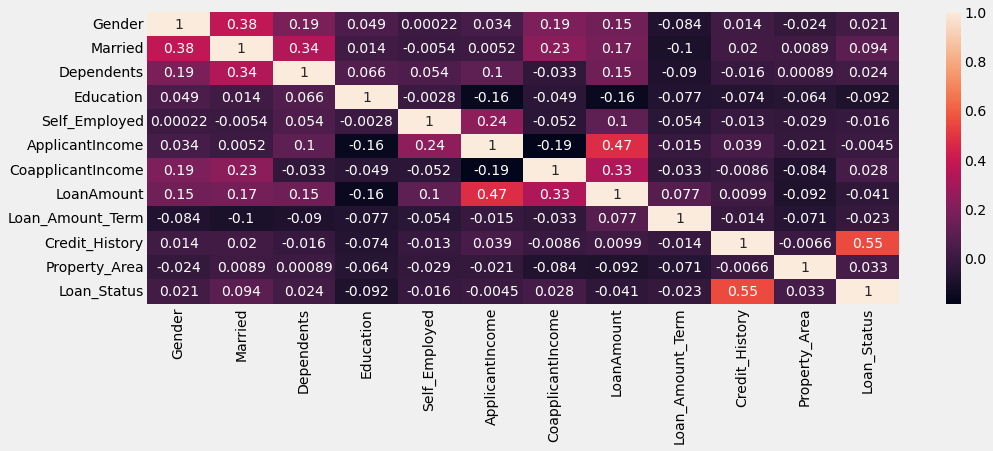

In [47]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Conclusions

* Credit History is Highly correlated to our target.
* Education, Self Employed, Applicant Income, Loan Amount, Loan Amount Term has Negative correlation.
* Gender, Married, Dependents, Coapplicant Income and Property Area are correlated.

### Splitting dataset

In [48]:
X = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [49]:
print(X.shape, y.shape)

(591, 11) (591,)


### Check if the Label 'Loan_Status' is balanced or not

1    408
0    183
Name: Loan_Status, dtype: int64

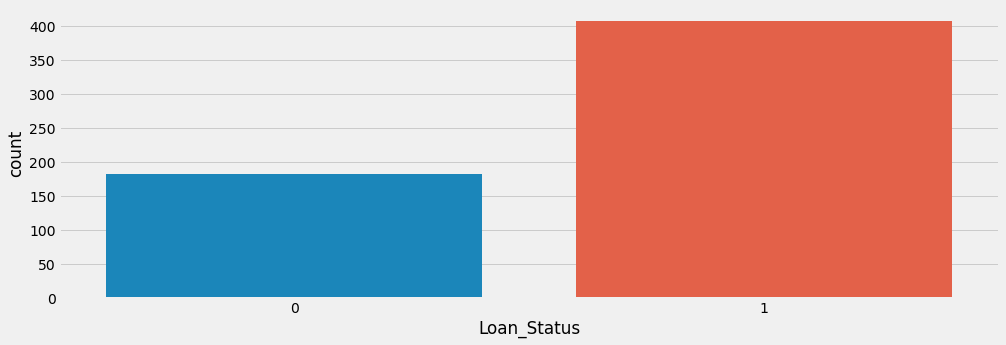

In [50]:
sns.countplot(df['Loan_Status'])
df['Loan_Status'].value_counts()

### Handling Imbalance Data

In [51]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [52]:
X_resample, y_resample = SMOTE().fit_resample(X, y)

In [53]:
print(X_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


### Train Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.20, random_state = 0)

In [56]:
X_train.shape, X_test.shape

((652, 11), (164, 11))

In [57]:
y_train.shape, y_test.shape

((652,), (164,))

### Models we will use:
    
* Decision Tree
* Random Forest
* XGBoost
* Logistic Regression
* SVC

#### The Process of Modeling the Data:

* Importing the model
* Fitting the model
* Classification report by Loan Status
* Overall accuracy
* Predicting Loan Status

### Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [101]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 0, max_depth=7, min_samples_leaf=1, min_samples_split=4)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=4, random_state=0)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = dtree.predict(X_test)
DT_SC = accuracy_score(y_test, y_pred)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 76.83 %


In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        82
           1       0.74      0.82      0.78        82

    accuracy                           0.77       164
   macro avg       0.77      0.77      0.77       164
weighted avg       0.77      0.77      0.77       164



### Checking Training and Testing Accuracy

In [105]:
print("Training Accuracy",dtree.score(X_train,y_train))
print("Testing Accuracy",dtree.score(X_test,y_test))

Training Accuracy 0.8941717791411042
Testing Accuracy 0.7682926829268293


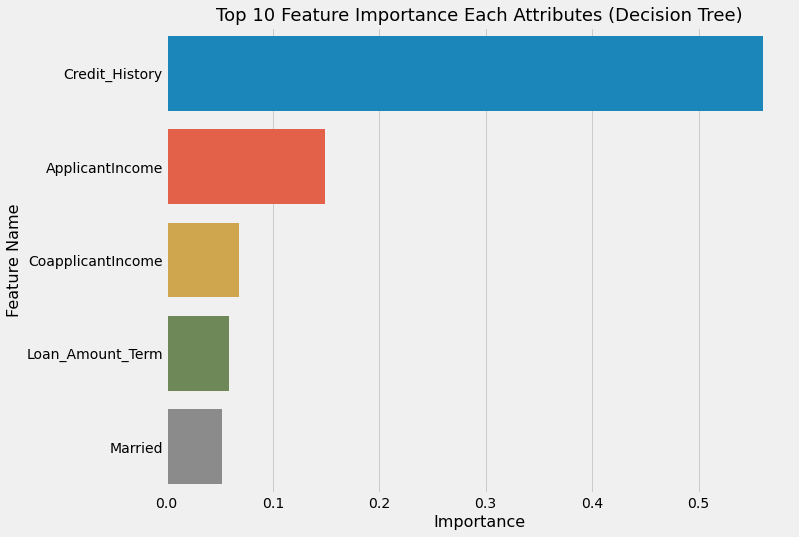

In [106]:
# Checking the important features

imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(5)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

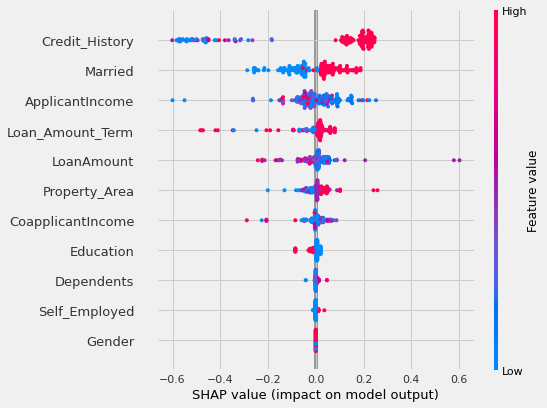

In [107]:
import shap
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

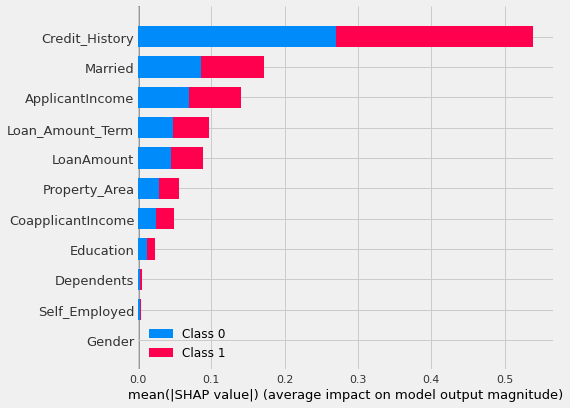

In [108]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7682926829268293')

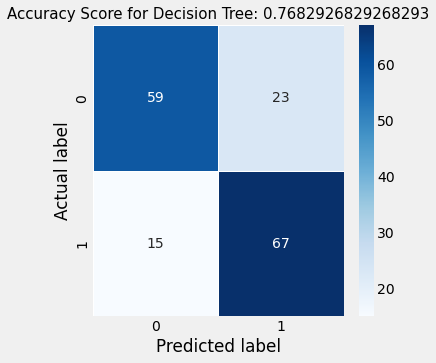

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

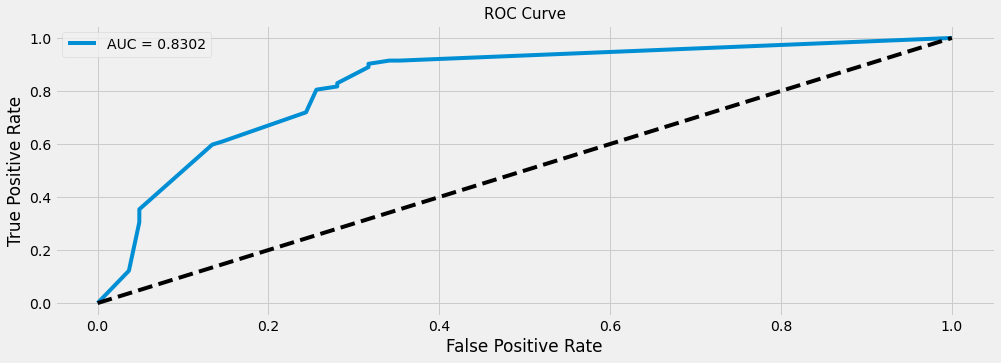

In [112]:
# Plotting ROC Curve and Calculating AUC 

from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc1 = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc1)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': None, 'n_estimators': 100}


In [115]:
rfc = RandomForestClassifier(max_depth = 10, random_state=0, max_features=None, n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=None, random_state=0)

In [116]:
y_pred = rfc.predict(X_test)
RF_SC = accuracy_score(y_test, y_pred)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 78.05 %


In [117]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        82
           1       0.76      0.83      0.79        82

    accuracy                           0.78       164
   macro avg       0.78      0.78      0.78       164
weighted avg       0.78      0.78      0.78       164



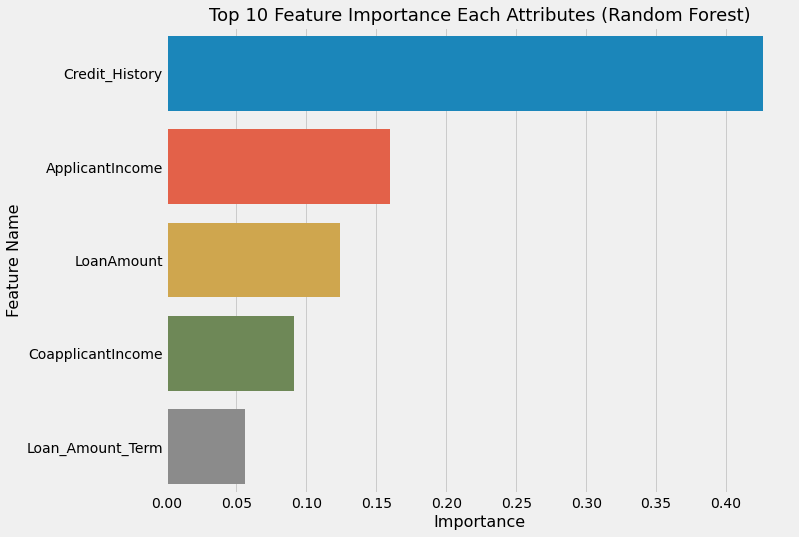

In [118]:
# Checking the important features

imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(5)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

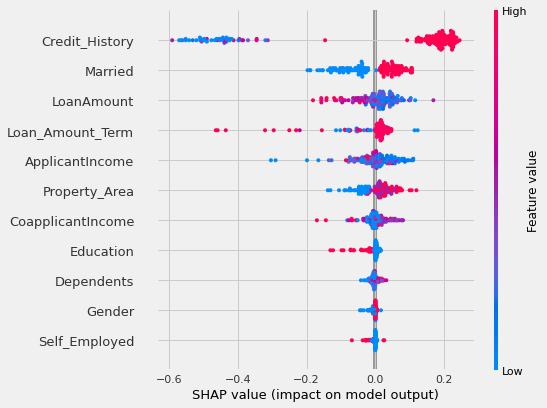

In [119]:
import shap
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

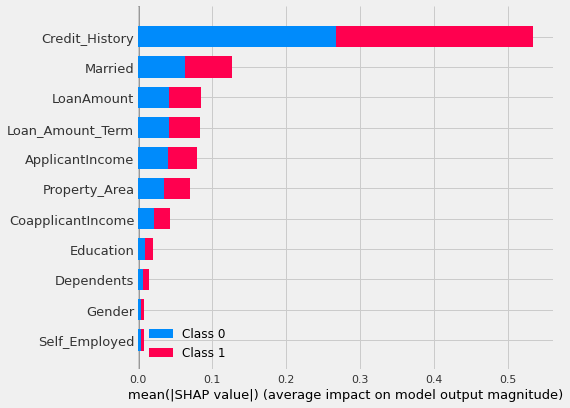

In [120]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.7804878048780488')

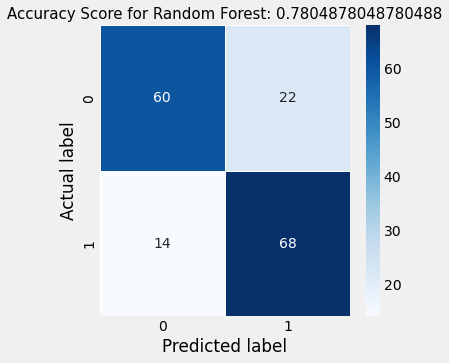

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

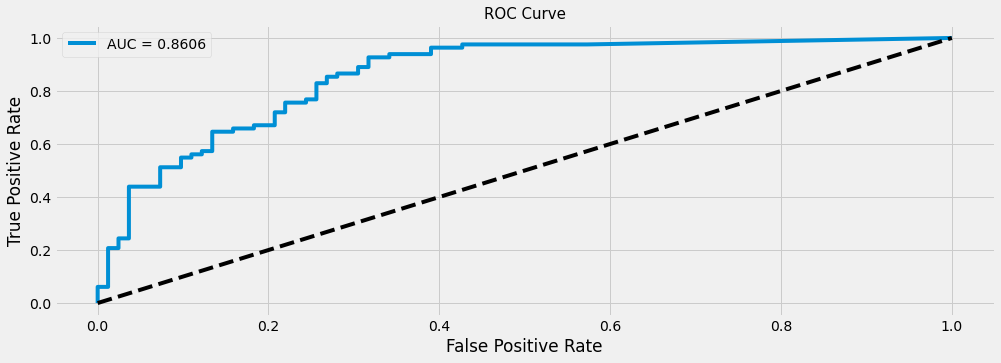

In [122]:
# Plotting ROC Curve and Calculating AUC 

from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc2 = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc2)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

### XGBoost

In [123]:
from xgboost import XGBClassifier

In [124]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

# Accuracy score
XGB_SC = accuracy_score(y_test, y_pred)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

#  prediction Summary by species
print(classification_report(y_test, y_predict))

Accuracy Score : 78.05 %
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        82
           1       0.80      0.80      0.80        82

    accuracy                           0.80       164
   macro avg       0.80      0.80      0.80       164
weighted avg       0.80      0.80      0.80       164



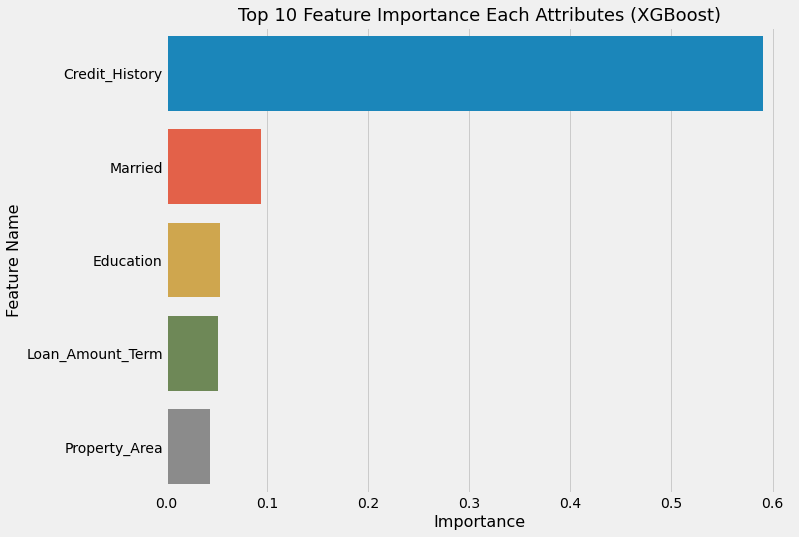

In [125]:
# Checking the important features

imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": XGB.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(5)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (XGBoost)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for XGBoost: 0.7987804878048781')

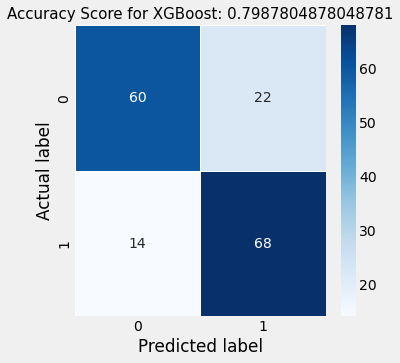

In [126]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm1,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for XGBoost: {0}'.format(XGB.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

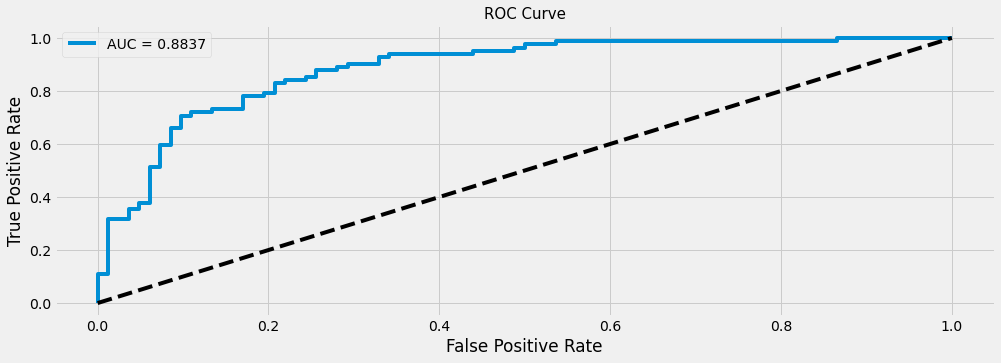

In [127]:
# Plotting ROC Curve and Calculating AUC 

from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = XGB.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc3 = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc3)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

### Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

# Accuracy score
LR_SC = accuracy_score(y_test, y_pred)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

#  prediction Summary by species
print(classification_report(y_test, y_predict))

Accuracy Score : 74.39 %
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        82
           1       0.80      0.80      0.80        82

    accuracy                           0.80       164
   macro avg       0.80      0.80      0.80       164
weighted avg       0.80      0.80      0.80       164



### Checking Training and Testing Accuracy

In [130]:
print("Training Accuracy",lr.score(X_train,y_train))
print("Testing Accuracy",lr.score(X_test,y_test))

Training Accuracy 0.7576687116564417
Testing Accuracy 0.7439024390243902


Text(0.5, 1.0, 'Accuracy Score for Logistic Regression: 0.7439024390243902')

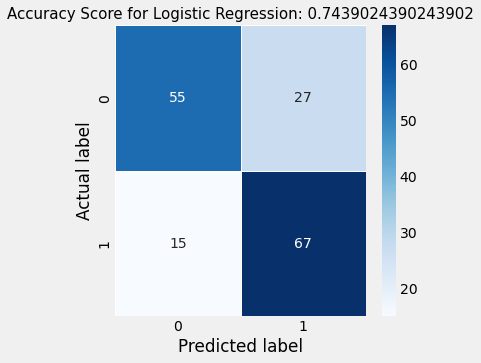

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

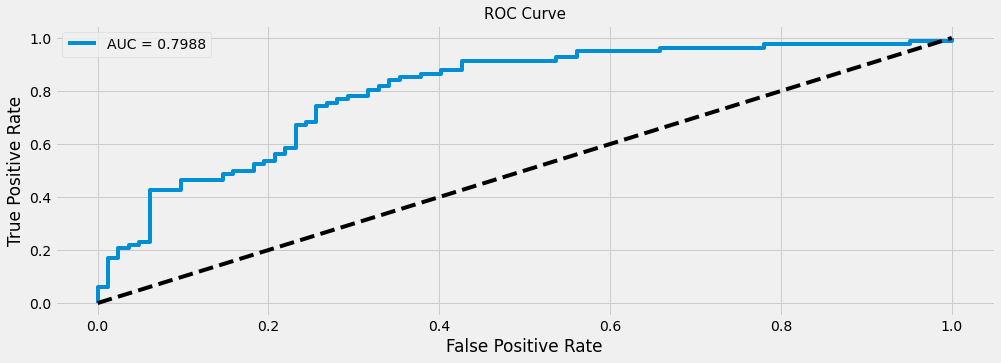

In [132]:
# Plotting ROC Curve and Calculating AUC 

from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc4 = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc4)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

### SVC Algorithm

In [133]:
from sklearn.svm import SVC

In [134]:
classifier = SVC(kernel='linear', gamma = 'auto', probability = True)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

# Accuracy score
SVC_SC = accuracy_score(y_test, y_pred)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

#  prediction Summary by species
print(classification_report(y_test, y_predict))

Accuracy Score : 74.39 %
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        82
           1       0.80      0.80      0.80        82

    accuracy                           0.80       164
   macro avg       0.80      0.80      0.80       164
weighted avg       0.80      0.80      0.80       164



### Checking Training and Testing Accuracy

In [135]:
print("Training Accuracy",classifier.score(X_train,y_train))
print("Testing Accuracy",classifier.score(X_test,y_test))

Training Accuracy 0.7668711656441718
Testing Accuracy 0.7439024390243902


Text(0.5, 1.0, 'Accuracy Score for SVC: 0.7439024390243902')

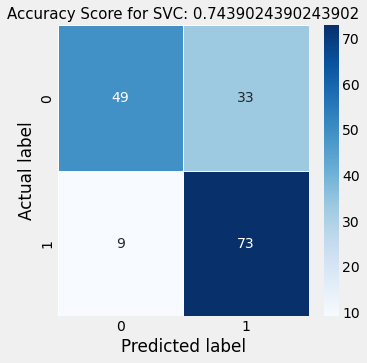

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for SVC: {0}'.format(classifier.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

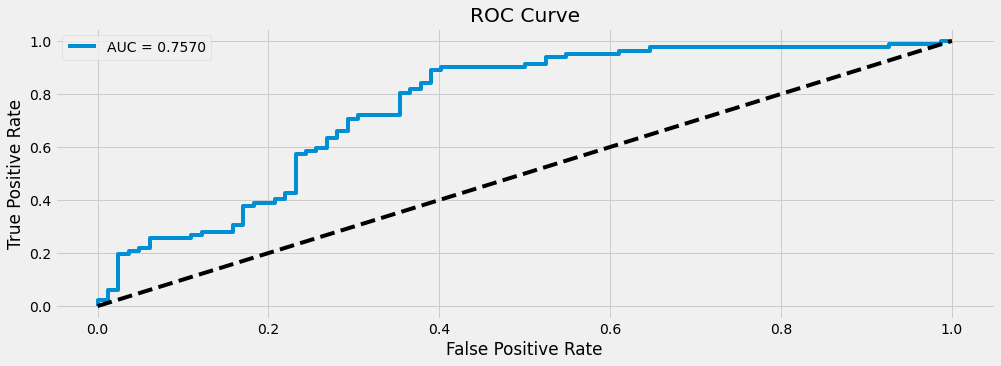

In [141]:
# Plotting ROC Curve and Calculating AUC 

# Predict the probabilities of the positive class for the test data
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR) and true positive rate (TPR) for differe
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve (AUC)
auc5 = roc_auc_score(y_test, y_pred_proba)

# Plot thr ROC Curve
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc5)
plt.plot([0,1],[0,1], linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Comparison of Accuracy for Different Methods

In [142]:
Score = [DT_SC,RF_SC,XGB_SC,LR_SC,SVC_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression","SVC"],
    'Score': Score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
1,Random Forest,0.780488
2,XGBoost,0.780488
0,Decision Tree,0.768293
3,Logistic Regression,0.743902
4,SVC,0.743902


### Comparison of AUC for Different Methods

In [144]:
Score = [auc1, auc2, auc3, auc4, auc5]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression", "SVC"],
    'Score': Score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
2,XGBoost,0.883700
1,Random Forest,0.860648
0,Decision Tree,0.830235
3,Logistic Regression,0.798780
4,SVC,0.756990


### Conclusion:
* Credit_History is a very important variable because of its high correlation with Loan Status therefor showing high Dependancy for for predicting the loan getting approved or not.
* The Random Forest algorithm and XGBoost Algorithm provides highest accuracy and also XGBoost algorithm gives the AUC highest in comparison to other methods. 

In [140]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Checking the model is able to perform Loan Status Prediction

In [96]:
input_data = (1,1,0,1,1,2000,0.0,66.0,180.0,1.0,2)

input_data = np.array(input_data) # changing the input_data to numpy array

input_data_reshaped = input_data.reshape(1,-1) # reshape the array 

prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not eligible for loan')
else:
  print('\nThe person is eligible for loan')

[1]

The person is eligible for loan
